# Backward Elimination

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os 
os.chdir('/Datasets/')

In [3]:
import pandas as pd
df = pd.read_csv('Cars93.csv')
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [5]:
s = df.isna().sum()
s

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [6]:
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [7]:
df.duplicated().sum()

0

# Seperate X and Y Features

In [8]:
X = df.drop(columns=['id','Weight'])
Y = df[['Weight']]

In [9]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


# Seperate Cat and Con Features for X

In [10]:
from PM7 import catconsep

In [11]:
cat,con = catconsep(X)

In [12]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [13]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

# Feature Selection Pipeline
Cat - OrdinalEncoder

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:
# num pipe1
num_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])
# cat pipe1
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy= 'most_frequent')),
                           ('Ordinal',OrdinalEncoder())])
# pre1
pre1 = ColumnTransformer([('num',num_pipe1,con),
                         ('cat',cat_pipe1,cat)])


In [16]:
X_pre = pre1.fit_transform(X)
X_pre

array([[-0.48578741, -0.37572014, -0.28246529, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.38801699,  1.49784409,  1.53140881, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.00865782,  0.99822696,  0.94805231, ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [ 0.66378585,  0.39452293,  0.16416702, ...,  1.        ,
         1.        , 87.        ],
       [ 0.53733279,  0.33207079,  0.14593713, ...,  1.        ,
         1.        , 91.        ],
       [ 0.88220476,  0.7484184 ,  0.60168439, ...,  1.        ,
         1.        , 92.        ]])

In [17]:
cols = pre1.get_feature_names_out()
cols

array(['num__Min.Price', 'num__Price', 'num__Max.Price', 'num__MPG.city',
       'num__MPG.highway', 'num__EngineSize', 'num__Horsepower',
       'num__RPM', 'num__Rev.per.mile', 'num__Fuel.tank.capacity',
       'num__Passengers', 'num__Length', 'num__Wheelbase', 'num__Width',
       'num__Turn.circle', 'num__Rear.seat.room', 'num__Luggage.room',
       'cat__Manufacturer', 'cat__Model', 'cat__Type', 'cat__AirBags',
       'cat__DriveTrain', 'cat__Cylinders', 'cat__Man.trans.avail',
       'cat__Origin', 'cat__Make'], dtype=object)

In [18]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-1.033015,0.0,48.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.396643,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.039228,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1.111472,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,-0.318186,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0


# Feature Selection¶

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
lr = LinearRegression()
sel = SequentialFeatureSelector(lr,direction='backward')
sel_features = sel.fit_transform(X_pre,Y)

In [20]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Price', 'num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Length',
       'num__Wheelbase', 'cat__Manufacturer', 'cat__Type', 'cat__AirBags',
       'cat__Cylinders', 'cat__Origin'], dtype=object)

In [21]:
len(sel_cols)

13

In [22]:
sel_cols[0].split('__')[1]

'Price'

In [23]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [24]:
imp_cols

['Price',
 'MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Manufacturer',
 'Type',
 'AirBags',
 'Cylinders',
 'Origin']

In [25]:
X_sel = X[imp_cols]
X_sel.head()

,Price,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Wheelbase,Manufacturer,Type,AirBags,Cylinders,Origin
0,15.9,31,140,6300,13.2,5,177,102,Acura,Small,None,4,non-USA
1,33.9,25,200,5500,18.0,5,195,115,Acura,Midsize,Driver & Passenger,6,non-USA
2,29.1,26,172,5500,16.9,5,180,102,Audi,Compact,Driver only,6,non-USA
3,37.7,26,172,5500,21.1,6,193,106,Audi,Midsize,NaN,6,non-USA
4,30.0,30,208,5700,21.1,4,186,109,BMW,Midsize,Driver only,4,non-USA


# Seperate cat_sel and con_sel

In [26]:
cat_sel, con_sel = catconsep(X_sel)

In [27]:
cat_sel

['Manufacturer', 'Type', 'AirBags', 'Cylinders', 'Origin']

In [28]:
con_sel

['Price',
 'MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase']

# Creating final Pipeline

Import OneHotEncoder

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
# num pipe2
num_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])
# cat pipe2
cat_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
# pre2
pre2= ColumnTransformer([('num',num_pipe2,con_sel),
                        ('cat',cat_pipe2,cat_sel)])


In [33]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[-0.37572014,  0.36092485, -0.07348445, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.49784409, -0.77051373,  1.07832243, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.99822696, -0.58194063,  0.54081255, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.39452293, -0.77051373,  0.65599324, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.33207079, -0.20479444, -0.57260077, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.7484184 , -0.20479444,  0.46402543, ...,  0.        ,
         0.        ,  1.        ]])

In [34]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Price', 'num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Length',
       'num__Wheelbase', 'cat__Manufacturer_Acura',
       'cat__Manufacturer_Audi', 'cat__Manufacturer_BMW',
       'cat__Manufacturer_Buick', 'cat__Manufacturer_Cadillac',
       'cat__Manufacturer_Chevrolet', 'cat__Manufacturer_Chrylser',
       'cat__Manufacturer_Chrysler', 'cat__Manufacturer_Dodge',
       'cat__Manufacturer_Eagle', 'cat__Manufacturer_Ford',
       'cat__Manufacturer_Geo', 'cat__Manufacturer_Honda',
       'cat__Manufacturer_Hyundai', 'cat__Manufacturer_Infiniti',
       'cat__Manufacturer_Lexus', 'cat__Manufacturer_Lincoln',
       'cat__Manufacturer_Mazda', 'cat__Manufacturer_Mercedes-Benz',
       'cat__Manufacturer_Mercury', 'cat__Manufacturer_Mitsubishi',
       'cat__Manufacturer_Nissan', 'cat__Manufacturer_Oldsmobile',
       'cat__Manufacturer_Plymouth', 'cat__Manufacturer_Pontiac',
       'cat__Manufacturer_Saab', 'ca

In [35]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=final_cols)
X_sel_pre.head()

,num__Price,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
0,-0.375720,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.427186,-0.286932,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.497844,-0.770514,1.078322,0.369586,0.409445,-0.083243,0.812171,1.629649,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.998227,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.220626,-0.286932,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.893374,-0.581941,0.540813,0.369586,1.359872,0.884457,0.674465,0.302785,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.091905,0.172352,1.231897,0.706562,1.359872,-1.050944,0.192493,0.745073,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=21)

In [37]:
xtrain.shape

(74, 57)

In [38]:
xtest.shape

(19, 57)

# Create a final model

In [39]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

# Evaluate the Model

In [40]:
model.score(xtrain,ytrain)

0.9859914776613601

In [41]:
model.score(xtest,ytest)

0.9133161505760073

# predict the data for xtrain and ytest

In [42]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [43]:
ypred_tr[0:5]

array([[2864.4457755 ],
       [2444.05827698],
       [3552.36775736],
       [3543.58581955],
       [4107.94678651]])

In [44]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [45]:
ypred_ts[0:5]

array([[2632.46494611],
       [3911.75987976],
       [3223.30514299],
       [3664.75090238],
       [3852.99325493]])

In [46]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


# Evaluate The Model

In [47]:
from PM7 import evaluate_model
evaluate_model(xtrain,ytrain,xtest,ytest,model) 

Training Results are :
MSE : 4712.06
RMSE : 68.64
MAE : 49.90
R2 : 0.9860

*****************************************

Testing Results are :
MSE : 31439.97
RMSE : 177.31
MAE : 139.25
R2 : 0.9133


# Backward selection model is Not Better here.

In [48]:
xtrain.shape

(74, 57)

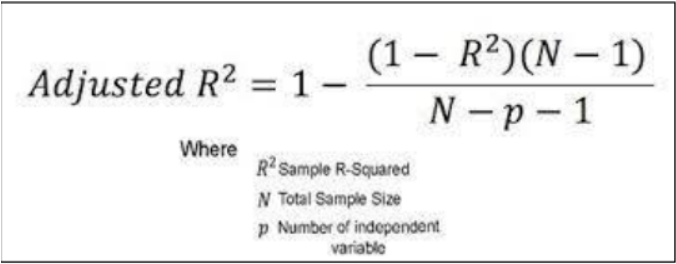

In [49]:
def r2_adj(xtrain,ytrain,model):
    r2 = model.score(xtrain,ytrain)
    N = xtrain.shape[0]
    p =xtrain.shape[1]
    num = (1-r2)*(N-1)
    den = N-p-1
    adj_r2 = 1-num/den
    return adj_r2

In [50]:
r2_adj(xtrain,ytrain,model)

0.9360861168299554